# Sobre este Notebook

En este Notebook vamos a mostrar distintas técnicas que pueden servir de cara a la práctica 3:

- Uso de datos no balanceados.
- Etiquetar de forma correcta.

# Trabajando con datos no Balanceados

Lo primero vamos a mostrar cómo se pueden trabajar con datos no balanceados. Para ello, usaremos un paquete específico para ello: [imbalanced-learn](http://glemaitre.github.io/imbalanced-learn/install.html).

Una explicación más detallada puede verse en https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb


¿Por qué es malo *aprender* con datos no balanceados?

Por varios motivos:
    
- Si una clase está *sobrerepresentada* frente al resto, el modelo tendrá mucha tendencia a elegirlo. Esto puede ser problemático o no, si los datos finales a predecir mantienen el mismo no-balanceamiento, pero si no fuese el caso sí podría dar problemas.

- Si una clase aparece poco en las muestras respecto al resto el modelo puede tener tendencia a *despreciar* dicha clase ya que le afecta poco a sus medidas, llegando incluso a ignorarla en casos extremos. Esto se produce independientemente de si dicho no-balanceamiento aparece también en los datos finales sobre los que se vaya a predecir.

Como comento, la gravedad depende del nivel de desbalanceamiento y de si el conjunto de datos a predecir mantiene el balanceamiento o no, pero en cualquier caso puede ser problemático, y es recomendable tratarlo.

Pero antes de empezar, hay que valorar los datos que tenemos en el Datasets y el grado de balanceo. Dependendiendo de las características puede ser más conveniente uno que otro: undersampling, y oversampling.

Ambas técnicas están implementadas en un paquete específico que usaremos: [imbalanced-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) que está [bien documentado](http://glemaitre.github.io/imbalanced-learn/index.html)

## Creando datos sintáticos

Para este ejemplo no vamos a usar datos reales, si no datos sintéticos, Scikit-learn posee varios métodos para ello.

In [12]:
#!pip3 install imblearn
from imblearn.datasets import make_imbalance
from sklearn.datasets import make_moons

In [13]:
X, y = make_moons(n_samples=1000, shuffle=True, noise=0.5, random_state=10)
# Le metemos 
X, y = make_imbalance(X, y,  sampling_strategy={0: 80, 1: 400}, min_c_=1)

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

Lo primero es ver cómo de desbalanceado está

In [15]:
from collections import Counter

In [16]:
Counter(y)

Counter({0: 80, 1: 400})

Se ve que está desbalanceado, una clase aparece siete veces más que otra.

##  Visualmente

In [17]:
def plot(X, y, title="Ejemplo de clases"):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.8)
    ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)

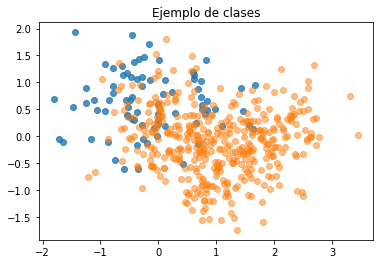

In [18]:
plot(X, y)

De unas hay mucho más clases que de otras.

## Undersampling

El undersampling es muy fácil, implica filtrar las instancias de clases que ya tengan muchos representantes. Hay varias estrategias, pero ahora aplicamos el modo por defecto:

[Documentación de la librería de undersampling](https://imbalanced-learn.readthedocs.io/en/stable/under_sampling.html)

Escogemos uno aleatorio primero

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

Es interesante el atributo **sampling_strategy**, especialmente para multiclase.

In [ ]:
rus = RandomUnderSampler(random_state=40, sampling_strategy='majority')

In [ ]:
Xu, yu = rus.fit_resample(X, y)

In [ ]:
Counter(yu)

In [ ]:
plot(Xu, yu, title="Ejemplo de undersampling")

## Oversampling

Ahora vamos a probar con  undersampling (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
Xo, yo = SMOTE().fit_resample(X, y)

In [ ]:
Counter(yo)

In [ ]:
plot(Xo, yo, title="Ejemplo de oversampling")

# Aplicando misma Etiqueta a varios ficheros

Hay que tener cuidado aplicando etiquetas a ficheros distintos

In [ ]:
import pandas as pd

Como sólo quiero mostrar el problema de etiquetado ignoro los nulos

In [ ]:
df_train = pd.read_csv("train.csv").dropna()

In [ ]:
df_test = pd.read_csv("test.csv").dropna()

Vamos a etiquetar un atributo cualquiera, como Asientos

In [ ]:
df_train.Asientos.head()

In [ ]:
df_test.Asientos.head()

## Forma errónea de hacerlo

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_train_orig = df_train.copy()
df_test_orig = df_test.copy()

Aplicamos el etiquetado de forma independiente a cada uno

In [ ]:
df_train.Asientos = LabelEncoder().fit_transform(df_train_orig.Asientos)

In [ ]:
df_test.Asientos = LabelEncoder().fit_transform(df_test_orig.Asientos)

In [ ]:
df_train.Asientos.head()

In [ ]:
df_test.Asientos.head()

In [ ]:
for asientos in df_train_orig.Asientos.unique():
    label_train = df_train.Asientos[df_train_orig.Asientos == asientos].unique()
    label_test = df_test.Asientos[df_test_orig.Asientos == asientos].unique()
    
    
    if len(label_train)==0 or len(label_test)==0:
        continue
    
    if label_train != label_test:
        print("Error, {} es etiquetado en train como {} y en test como {}".format(asientos, label_train[0], label_test[0]))
        break

Ese problema puede hacer que las predicciones sobre el de test sean mucho peores.

## Forma correcta de hacerlo

La solución sería aprender a partir del fichero del mismo nombre con todos los datos

Primero aprendemos las etiquetas a partir de todos

In [ ]:
labelAsientos = LabelEncoder().fit(pd.read_csv("asientos.csv").Asientos)

Ahora usamos el mismo labelAsientos a ambos

In [ ]:
df_train.Asientos = labelAsientos.transform(df_train_orig.Asientos)
df_test.Asientos = labelAsientos.transform(df_test_orig.Asientos)

In [ ]:
df_train.Asientos.head()

In [ ]:
df_test.Asientos.head()

Ahora si comprobamos de nuevo

In [ ]:
for asientos in df_train_orig.Asientos.unique():
    label_train = df_train.Asientos[df_train_orig.Asientos == asientos].unique()
    label_test = df_test.Asientos[df_test_orig.Asientos == asientos].unique()
    
    if len(label_train)==0 or len(label_test)==0:
        continue
    
    if label_train != label_test:
        print("Error, {} es etiquetado en train como {} y en test como {}".format(asientos, label_train, label_test))
        break

Vemos que ahora las etiquetas coinciden